In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 129kB/s 
     |████████████████████████████████| 983kB 53.7MB/s 
     |████████████████████████████████| 266kB 51.5MB/s 
     |████████████████████████████████| 1.3MB 47.9MB/s 
     |████████████████████████████████| 471kB 51.5MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 2.9MB 49.0MB/s 
     |████████████████████████████████| 890kB 47.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.23.2-cp36-none-any.whl size=25272006 sha256=8ce7c62f0a602a9ff83838bc5ab75f04ac62366ee0090e6deb18fd638c973f05
  Stored in directory: /root/.cache/pip/wheels/fe/4a/b1/aff404c4e0893ca1c0b64781d0298b7ff6de94d5117a0e7d5c
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=3619e5a39e965c9cd9e55d537e2fd3257083d629378973b85a207aab0e1464c5
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [3]:
import pandas as pd
import ktrain
from ktrain import text

In [4]:
from  keras . utils  import  to_categorical
import numpy as np
from sklearn.model_selection import train_test_split


In [7]:
import pandas as pd 
df_train=pd.read_csv('drive/My Drive/Thesis Data/full doc csv/full_doc_train.csv')
df_test=pd.read_csv('drive/My Drive/Thesis Data/full doc csv/full_doc_test.csv')
total_data = pd.concat([df_train,df_test])
# we have to works with word level,if we works with charchter level then it exits the RAM limit
# here remove 'politics','education','sports' labels of text which is frequently occur in dataset and set it to news_3less.csv file
total_data = total_data[total_data['label']!='politics'] # remove the label which is 'politics'
total_data = total_data[total_data['label']!='education'] # remove the label which is 'education'
total_data = total_data[total_data['label']!='sports'] # remove the label which is 'sports'
print(len(total_data))
# df.to_csv(news/'news_3less.csv',index=False) # convert the data to csv format

51690


In [8]:
set(total_data.label)

{'accident',
 'art',
 'crime',
 'economics',
 'entertainment',
 'environment',
 'international',
 'opinion',
 'science_tech'}

In [9]:
authors_name = list(set(total_data['label']))

In [10]:
authors_name

['economics',
 'crime',
 'art',
 'international',
 'accident',
 'science_tech',
 'environment',
 'entertainment',
 'opinion']

In [11]:
def get(data):

  macronum=sorted(set(data['label']))
  macro_to_id = dict((note, number) for number, note in enumerate(macronum))

  def fun(i):
      return macro_to_id[i]

  data['label']=data['label'].apply(fun)

  return list(data['text']) , list(to_categorical(np.asarray(data['label']), num_classes=9)) # return text and label


In [12]:
x , y = get(total_data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


Step 1:Preprocess Data

In [13]:
trn, val, preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=authors_name,
                                          preprocess_mode='distilbert',
                                          maxlen=512)


preprocessing train...
language: bn
train sequence lengths:
	mean : 295
	95percentile : 894
	99percentile : 1330


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 299
	95percentile : 910
	99percentile : 1321


task: text classification


Step 2:Build a model and wrap in learner

In [14]:
text.print_text_classifiers()


fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [15]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)


Is Multi-Label? False
maxlen is 512



done.


In [16]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)


STEP 3: Train Model

In [17]:
learner.fit_onecycle(3e-5, 4)




begin training using onecycle policy with max lr of 3e-05...
Epoch 1/4
6462/6462 [==============================] - 3130s 484ms/step - loss: 0.8528 - accuracy: 0.7287 - val_loss: 0.5398 - val_accuracy: 0.8271
Epoch 2/4
6462/6462 [==============================] - 3139s 486ms/step - loss: 0.4771 - accuracy: 0.8480 - val_loss: 0.4504 - val_accuracy: 0.8504
Epoch 3/4
6462/6462 [==============================] - 3138s 486ms/step - loss: 0.3678 - accuracy: 0.8781 - val_loss: 0.3703 - val_accuracy: 0.8773
Epoch 4/4
6462/6462 [==============================] - 3137s 485ms/step - loss: 0.2477 - accuracy: 0.9149 - val_loss: 0.3347 - val_accuracy: 0.8941


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
6461/6461 [==============================] - 2849s 441ms/step - loss: 0.1862 - accuracy: 0.9355


done.
Visually inspect loss plot and select learning rate associated with falling loss


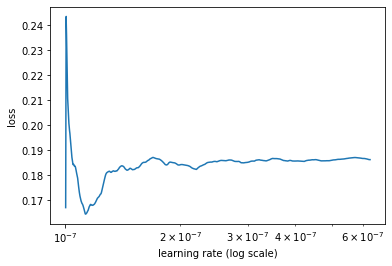

In [18]:
learner.lr_find(max_epochs=10 , show_plot=True)


Making Predictions

In [19]:
predictor = ktrain.get_predictor(learner.model, preproc)


In [20]:
predictor.predict(x_test[0:5])


['economics', 'entertainment', 'accident', 'international', 'art']

In [21]:
predictor.save('Colab Notebooks/BERTpredictor9news')
